In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
data = pd.read_csv("glass.csv")
del data['Unnamed: 0']

In [2]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


## change text labels->digits



In [3]:
data['Type'] = data['Type'].replace({'building_windows_float_processed' : 0, 'building_windows_non_float_processed' : 1,
                                     'vehicle_windows_float_processed' : 2,  'vehicle_windows_non_float_processed'  : 3,
                                     'containers' : 4, 'tableware' : 5,'headlamps' : 6})

## check_isnull()

In [4]:
data.isnull().sum()

RI      1
Na      0
Mg      1
Al      1
Si      2
K       1
Ca      1
Ba      0
Fe      0
Type    0
dtype: int64

## Nan->mean

In [5]:
data = data.fillna(data.mean())

In [6]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

## to avoid repeats

In [7]:
from sklearn.utils import shuffle

In [8]:
data = shuffle(data)

In [9]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,0
49,1.51898,13.58,3.35,1.23,72.08,0.59,8.91,0.00,0.00,0
195,1.51545,14.14,0.00,2.68,73.39,0.08,9.07,0.61,0.05,6
72,1.51593,13.09,3.59,1.52,73.10,0.67,7.83,0.00,0.00,1
90,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.00,0.22,1


## lib for our model

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [11]:
labels = data['Type']
del data['Type']

In [22]:
X = data
Y = labels
set(list(Y))

{0, 1, 2, 4, 5, 6}

## split data to train and test samples

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) # 70% training and 30% test

## model

In [24]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## metrics and result

In [25]:
from sklearn import metrics

y_pred=clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8769230769230769


## feature_importance

In [16]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=data.columns).sort_values(ascending=False)
feature_imp

Al    0.159104
Mg    0.153911
Ca    0.136608
RI    0.132572
Na    0.128526
Si    0.081546
K     0.080450
Ba    0.079795
Fe    0.047487
dtype: float64

## visualize feature_importance

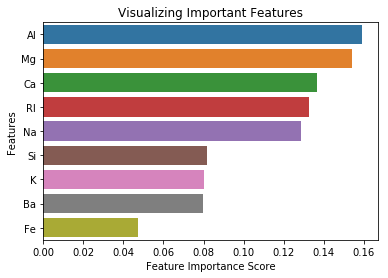

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to my graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## build confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[18,  1,  1,  0,  0,  0],
       [ 8, 18,  0,  1,  0,  0],
       [ 3,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  3,  0,  0],
       [ 0,  1,  0,  0,  3,  0],
       [ 0,  0,  0,  1,  0,  5]], dtype=int64)

Text(69.0, 0.5, 'Truth')

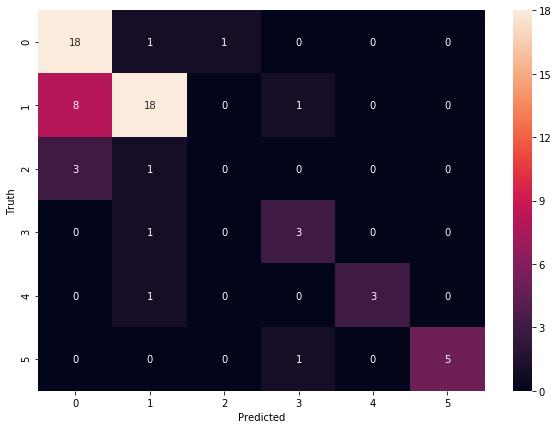

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')